 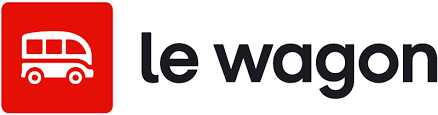

# Shop orders analysis

a) Upload [order_data](https://drive.google.com/file/d/1FFS8VSJxafYx7tMoQdoFzKbIl4QOHWK2/view?usp=sharing) in Colab and load it in a DataFrame `df_order`

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df_order = pd.read_csv('Tiller_order_data.csv')

# Display the first few rows of the DataFrame
df_order.head()

b) What does a row represent? What information can you find?

c) What are the different statuses of an order? How many orders are there per status?

In [ ]:
# Get the count of orders per status
order_status_counts = df_order['dim_status'].value_counts()

# Display the different statuses and their corresponding order counts
print("Different statuses of an order:")
print(order_status_counts)


d) What is the proportion of orders with a CLOSE status?

In [ ]:
# Count the total number of orders with a CLOSE status
close_orders_count = df_order['dim_status'].value_counts().get('CLOSE', 0)

# Calculate the total number of orders
total_orders = len(df_order)

# Calculate the proportion of orders with a CLOSE status
proportion_close_orders = close_orders_count / total_orders

# Print the proportion of orders with a CLOSE status
print("Proportion of orders with a CLOSE status:", proportion_close_orders)


e) How many restaurants are there? What are their ids?

In [ ]:
# Get the unique restaurant IDs
restaurant_ids = df_order['id_store'].unique()

# Count the number of unique restaurants
num_restaurants = len(restaurant_ids)

# Print the number of restaurants and their IDs
print("Number of restaurants:", num_restaurants)
print("Restaurant IDs:", restaurant_ids)


f) Calculate the turnover per restaurant. Which restaurant has the highest turnover?

In [ ]:
# Calculate the turnover per restaurant
restaurant_turnover = df_order.groupby('id_store')['m_cached_payed'].sum()

# Find the restaurant with the highest turnover
restaurant_highest_turnover = restaurant_turnover.idxmax()
highest_turnover_value = restaurant_turnover.max()

# Print the turnover per restaurant and the restaurant with the highest turnover
print("Turnover per restaurant:")
print(restaurant_turnover)
print("\nRestaurant with the highest turnover:", restaurant_highest_turnover)
print("Highest turnover value:", highest_turnover_value)


g) Count the number of orders per restaurant. Which restaurant had the most orders in this data? Is it the same as the one with the highest turnover?

hint: use method `.size()`



In [ ]:
# Count the number of orders per restaurant
orders_per_restaurant = df_order.groupby('id_store').size()

# Find the restaurant with the most orders
restaurant_most_orders = orders_per_restaurant.idxmax()
most_orders_count = orders_per_restaurant.max()

# Print the number of orders per restaurant and the restaurant with the most orders
print("Number of orders per restaurant:")
print(orders_per_restaurant)
print("\nRestaurant with the most orders:", restaurant_most_orders)
print("Number of orders:", most_orders_count)


h) Calculate the average price of an order for each restaurant. Do you think you are facing the same types of restaurants?

In [ ]:
# Calculate the average price of an order per restaurant
avg_price_per_order = df_order.groupby('id_store')['m_cached_price'].mean()

# Print the average price of an order for each restaurant
print("Average price of an order per restaurant:")
print(avg_price_per_order)


i) The problem is that an order may be placed for several people. Instead, we want to know the average price spent by a single person in the restaurant.

Add a column to the initial dataframe,  representing the price of the order per customer

In [ ]:
# Calculate the price of the order per customer
df_order['price_per_customer'] = df_order['m_cached_price'] / df_order['m_nb_customer']

# Print the updated DataFrame with the new column
print(df_order.head())


j) Using the previous column, calculate the average price spent by each person in each of the restaurants.

In [ ]:
# Calculate the average price spent by each person in each restaurant
avg_price_per_person = df_order.groupby('id_store')['price_per_customer'].mean()

# Print the average price spent by each person in each restaurant
print("Average price spent by each person in each restaurant:")
print(avg_price_per_person)


k) It seems that there are data problems because for some restaurants the average price is lower than for others.

Do you have any idea why?

Fill the 0 values in the m_nb_customer column with 1 and then delete the rows where the m_cached_price column is 0

In [ ]:
# Fill 0 values in the m_nb_customer column with 1
df_order['m_nb_customer'] = df_order['m_nb_customer'].replace(0, 1)

# Delete rows where the m_cached_price column is 0
df_order = df_order[df_order['m_cached_price'] != 0]

# Recalculate the price of the order per customer
df_order['price_per_customer'] = df_order['m_cached_price'] / df_order['m_nb_customer']

# Recalculate the average price spent by each person in each restaurant
avg_price_per_person = df_order.groupby('id_store')['price_per_customer'].mean()

# Print the updated average price spent by each person in each restaurant
print("Updated average price spent by each person in each restaurant:")
print(avg_price_per_person)


l) Recalculate the price_per_customer column and the average price spent by each person in each restaurant.

In [ ]:
# Fill 0 values in the m_nb_customer column with 1
df_order['m_nb_customer'] = df_order['m_nb_customer'].replace(0, 1)

# Delete rows where the m_cached_price column is 0
df_order = df_order[df_order['m_cached_price'] != 0]

# Recalculate the price of the order per customer
df_order['price_per_customer'] = df_order['m_cached_price'] / df_order['m_nb_customer']

# Recalculate the average price spent by each person in each restaurant
avg_price_per_person = df_order.groupby('id_store')['price_per_customer'].mean()

# Print the updated average price spent by each person in each restaurant
print("Updated average price spent by each person in each restaurant:")
print(avg_price_per_person)


### Adding info

Restaurant 7965 has a higher price per person than the rest. Let's look at the time spent at the table to see if it can match a fancy restaurant.

m) Convert the date_opened and date_closed columns to datetime format

In [ ]:
# Convert the date_opened and date_closed columns to datetime format
df_order['date_opened'] = pd.to_datetime(df_order['date_opened'])
df_order['date_closed'] = pd.to_datetime(df_order['date_closed'])

# Print the DataFrame to verify the changes
print(df_order.head())


n) Run the code below to calculate the time between the opening and closing date of an order in minutes.

o) Calculate the average time at table for each restaurant.

In [ ]:
# Calculate the duration of each order
df_order['order_duration'] = df_order['date_closed'] - df_order['date_opened']

# Calculate the average time at table for each restaurant
avg_time_at_table = df_order.groupby('id_store')['order_duration'].mean()

# Print the average time at table for each restaurant
print("Average time at table for each restaurant:")
print(avg_time_at_table)


Some restaurants have very short average order times. It seems that there are fast food restaurants among them.

### Joins operations

p) Download data [order_line](https://drive.google.com/file/d/1__qsD7pioaKiCgZoCVzWM6MbNwOPBQ94/view?usp=sharing) and [store_data](https://drive.google.com/file/d/1rnXVD0CrJXTupUuJ6uUHc34Z_kl-y7Im/view?usp=sharing) and upload them in two DataFrame `df_line` and `df_store`.

q) What new information do you have access to through this data?

- Order line: The different products in an order
- Store data : Information about the restaurant/bar

r) How many orders were placed in the 2nd arrondissement of Paris? (It refers to zipcode 75002)

s) Let's take the restaurant 4542. Its average ordering time was very short.

Display the most ordered items in this restaurant. To do this, keep only the id_store and id_order columns from df_order and the id_order, id_order_line and dim_name columns from order_line.

Note that the dim_name column exists in both df_order and df_line.

Is it a fast food ? It's more a charcuterie